In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
#@author Sam

## Gradient descent


The goal is to move from a "high cost" to a "low cost" region of parameter-space, where the costs are determined by a pre-determined function. So, suppose you start in the top right corner of the image below (high cost) to the dark blue region in the bottom left (low cost). The arrows represent the direction of steepest descent (negative gradient) from any given point–the direction that decreases the cost function as quickly as possible.
      

<img src="gradient_descent.png">   
   

Starting at the top right, we take our first step downhill in the direction specified by the negative gradient. Next we recalculate the negative gradient (passing in the coordinates of our new point) and take another step in the direction it specifies. We continue this process until we get to the bottom of our grap (or to a point where we can no longer move downhill---a local minimum).


<img src="gradient_descent_demystified.png">

    

More formally, suppose you have some parameters $\theta$ and a cost function $C$ (e.g., stress for MDS). To use gradient descent to find the minimum, calculate the derivatives of the parameters with respect to the cost and move in the opposite direction, with step-size $\eta$.


$\theta = \theta - \eta \cdot \nabla_\theta C( \theta)$
   

<img src="contours_evaluation_optimizers.gif">

   

Source: https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

[ 49.70070108  48.630916    34.96098364  92.50702921  91.00054959
  83.55184468  60.66556075  97.56681054 134.44944163 107.36008118
 167.74592861 148.51060088 169.93763813 130.79171962 160.60116263
 145.19343196 197.3717531  166.64080629 201.86655575 179.87620885
 152.25829202 229.06678932 185.67945095 260.16166937 244.09311144
 229.81021534 250.73425197 254.53430063 276.45858352 319.94785843
 255.5723326  292.90134444 241.703737   279.63557601 332.58866831
 291.00479755 305.70657621 375.19525731 281.78731043 314.58959561
 384.5312692  404.6137522  373.13929088 336.89578491 388.29526133
 444.97821198 374.95596165 363.08052847 379.0666415  417.91988884
 413.581768   429.18469929 428.84265332 450.37220291 446.40110319
 487.31280026 464.06235771 432.99330439 489.97766876 517.48800422
 533.40963618 520.72187027 481.96429519 540.98500856 502.97637473
 513.80751427 515.78576417 562.0414647  573.81693542 571.96111598
 548.34249195 636.17314941 612.10180604 597.95619846 594.13143847
 635.65201

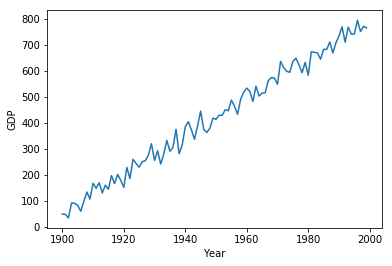

In [2]:
RNG = np.arange(100)
YEARS = RNG + 1900

INTERCEPT = 50
SLOPE = 7.4
GDP = INTERCEPT + RNG * SLOPE + np.random.normal(0,25,YEARS.shape) #add some noise to it

print(GDP)

plt.plot(YEARS, GDP)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()


In [3]:
def linear_function(a,b,xs):
    return(a + b * xs)
    

def cost_function(generated, data):
    return np.sum((generated - data)**2.) #stress



a = 50
b = 7.4
gen = linear_function(a,b,RNG)
cost = cost_function(gen,GDP)




print(cost)


67876.14443478263


In [4]:
def compute_derivs(a_curr,b_curr,xs,ys, delta=0.001):
    a_low = linear_function(a_curr-delta, b_curr,RNG)
    a_high = linear_function(a_curr+delta, b_curr,RNG)
    
                             
    b_low = linear_function(a_curr, b_curr-delta,RNG)
    b_high = linear_function(a_curr, b_curr+delta,RNG)
    
    a_deriv = (cost_function(a_high, ys) - cost_function(a_low, ys))/(2.*delta)
    b_deriv = (cost_function(b_high, ys) - cost_function(b_low, ys))/(2.*delta)
    
    return((a_deriv, b_deriv))



In [5]:
'''
LR is learning rate.
'''

def run(STEPS, LR=2e-6, delta=5e-2):
    #initialize intercept and slope
    a = np.random.normal() * 100
    b = np.random.normal() * 100
    
    costs = np.array([])
    all_a = np.array([])
    all_b = np.array([])

    for step in range(STEPS):
        
        all_a = np.append(all_a, a)
        all_b = np.append(all_b, b)
        
        
        if (step % 100 == 0):
            print("[%d] y = %.2f + %.2f * x" % (step, a, b))
            
            
        #compute derivatives
        derivs = compute_derivs(a, b, RNG,GDP, delta)
        
        #update a,b
        a -= LR * derivs[0]
        b -= LR * derivs[1]

        ys = linear_function(a,b,RNG)
        cost = cost_function(ys,GDP)
        costs = np.append(costs, cost)

        
        
    
    return(all_a, all_b, costs, derivs)




N_STEPS = 10000
tup = run(N_STEPS, LR = 3e-6, delta=1e-4)


all_a = tup[0]
all_b = tup[1]
costs = tup[2]
derivs = tup[3]
  



[0] y = -105.76 + 180.35 * x
[100] y = -105.75 + 18.37 * x
[200] y = -103.47 + 10.19 * x
[300] y = -101.10 + 9.74 * x
[400] y = -98.77 + 9.69 * x
[500] y = -96.47 + 9.65 * x
[600] y = -94.20 + 9.62 * x
[700] y = -91.97 + 9.58 * x
[800] y = -89.78 + 9.55 * x
[900] y = -87.61 + 9.52 * x
[1000] y = -85.48 + 9.49 * x
[1100] y = -83.38 + 9.46 * x
[1200] y = -81.31 + 9.42 * x
[1300] y = -79.28 + 9.39 * x
[1400] y = -77.27 + 9.36 * x
[1500] y = -75.30 + 9.33 * x
[1600] y = -73.35 + 9.30 * x
[1700] y = -71.44 + 9.28 * x
[1800] y = -69.55 + 9.25 * x
[1900] y = -67.69 + 9.22 * x
[2000] y = -65.86 + 9.19 * x
[2100] y = -64.06 + 9.16 * x
[2200] y = -62.28 + 9.14 * x
[2300] y = -60.53 + 9.11 * x
[2400] y = -58.81 + 9.08 * x
[2500] y = -57.12 + 9.06 * x
[2600] y = -55.45 + 9.03 * x
[2700] y = -53.80 + 9.01 * x
[2800] y = -52.18 + 8.98 * x
[2900] y = -50.58 + 8.96 * x
[3000] y = -49.01 + 8.94 * x
[3100] y = -47.46 + 8.91 * x
[3200] y = -45.94 + 8.89 * x
[3300] y = -44.44 + 8.87 * x
[3400] y = -42.96 

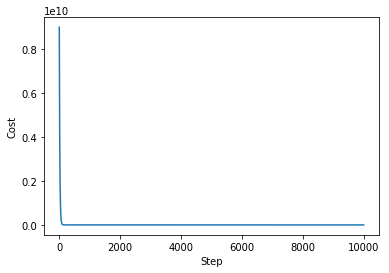

In [6]:
plt.plot(np.arange(N_STEPS), costs)
plt.xlabel("Step")
plt.ylabel("Cost")
plt.show()

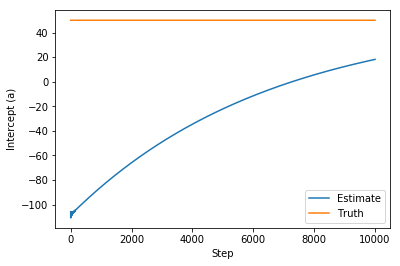

In [12]:

plt.plot(np.arange(N_STEPS), all_a, label="Estimate")
plt.plot(np.arange(N_STEPS), np.ones(N_STEPS)*INTERCEPT, label="Truth")

plt.xlabel("Step")
plt.ylabel("Intercept (a)")
plt.legend(loc = 'best')
plt.show()

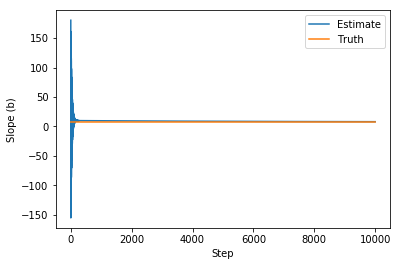

In [13]:
plt.plot(np.arange(N_STEPS), all_b, label="Estimate")
plt.plot(np.arange(N_STEPS), np.ones(N_STEPS)*SLOPE, label="Truth")

plt.xlabel("Step")
plt.ylabel("Slope (b)")
plt.legend(loc = 'best')
plt.show()

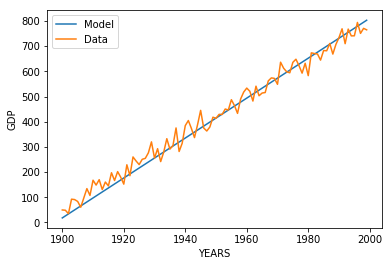

In [10]:

ys_est_final = linear_function(all_a[-1],all_b[-1], RNG)
plt.plot(YEARS, ys_est_final, label="Model")
plt.plot(YEARS, GDP, label="Data")

plt.xlabel("YEARS")
plt.ylabel("GDP")
plt.legend()
plt.show()

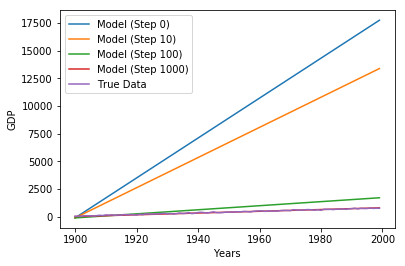

In [14]:

ys_est_0 = linear_function(all_a[0],all_b[0], RNG)
ys_est_10 = linear_function(all_a[10],all_b[10], RNG)
ys_est_100 = linear_function(all_a[100],all_b[100], RNG)

ys_est_final = linear_function(all_a[-1],all_b[-1], RNG)
plt.plot(YEARS, ys_est_0, label="Model (Step 0)")
plt.plot(YEARS, ys_est_10, label="Model (Step 10)")
plt.plot(YEARS, ys_est_100, label="Model (Step 100)")

plt.plot(YEARS, ys_est_final, label="Model (Step 1000)")
plt.plot(YEARS, GDP, label="True Data")

plt.xlabel("Years")
plt.ylabel("GDP")
plt.legend()
plt.show()
